In [2]:


import os
import pandas as pd
import numpy as np





# Directory containing the CSV files
directory = "../../result/experiments_output/test_N_threshold"

# Initialize variables
max_cs_accuracy = 0
min_steps = float('inf')
min_cs_accuracy_greater_than_sc = float('inf')
max_cs_acc_with_step_constraints = 0
max_abs_metric = 0

df_max_cs_accuracy = None
df_min_steps = None
df_min_cs_accuracy_greater_than_sc = None
df_max_cs_acc_with_step_constraints = None
df_max_abs_metric = None

max_cs_accuracy_N = None
max_cs_accuracy_threshold = None
min_steps_N = None
min_steps_threshold = None
min_cs_accuracy_greater_than_sc_N = None
min_cs_accuracy_greater_than_sc_threshold = None
max_cs_acc_with_step_constraints_N = None
max_cs_acc_with_step_constraints_threshold = None
max_abs_metric_N = None
max_abs_metric_threshold = None



def abs_metric1(acc, cost, sc_acc,  direct_acc, direct_cost=1,sc_cost=40):
    if direct_acc is None:
        direct_acc = sc_acc

    # Normalize the accuracy to be between 0 and 1
    if acc >= sc_acc:
        acc_factor = 1
    elif acc <= direct_acc:
        acc_factor = 0
    else:
        acc_factor = (acc - direct_acc) / (sc_acc - direct_acc)

    # Normalize the cost to be between 0 and 1
    if cost <= direct_cost:
        cost_factor = 1
    elif cost >= sc_cost:
        cost_factor = 0
    else:
        cost_factor = (sc_cost - cost) / (sc_cost - direct_cost)

    # Calculate the weighted average of acc_factor and cost_factor
    metric = 0.5 * acc_factor + 0.5 * cost_factor

    return metric


# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df['direct_acc'] = df['Correctness'].apply(lambda x: eval(x)[0])

# Calculate the mean of 'direct_acc' and assign it to a new variable 'direct_acc_mean'
        direct_acc_mean = df['direct_acc'].mean()

        # Extract N and threshold from the filename
        parts = filename.split("_")
        N = int(parts[4][0])
        threshold = float(parts[2])
        if(N <= 2):
            continue
        # Calculate CS accuracy, steps, and SC accuracy for the current DataFrame
        cs_accuracy = df['CS_correctness'].mean()
        steps = df['CS_steps'].mean()
        sc_accuracy = df['SC_correctness'].mean()
        es_avg_steps = df['ES_steps'].mean()
        asc_avg_steps = df['asc_steps'].mean()
        
        # Check for the best CS accuracy
        if cs_accuracy > max_cs_accuracy:
            max_cs_accuracy = cs_accuracy
            df_max_cs_accuracy = df
            max_cs_accuracy_N = N
            max_cs_accuracy_threshold = threshold
        
        # Check for the least number of steps
        if steps < min_steps:
            min_steps = steps
            df_min_steps = df
            min_steps_N = N
            min_steps_threshold = threshold
        
        # Check for the CS accuracy greater than SC with the least difference
        if cs_accuracy > sc_accuracy and cs_accuracy - sc_accuracy < min_cs_accuracy_greater_than_sc:
            min_cs_accuracy_greater_than_sc = cs_accuracy - sc_accuracy
            df_min_cs_accuracy_greater_than_sc = df
            min_cs_accuracy_greater_than_sc_N = N
            min_cs_accuracy_greater_than_sc_threshold = threshold
        
        # Check for CS accuracy with step constraints
        if steps < es_avg_steps and steps < asc_avg_steps:
            if cs_accuracy > max_cs_acc_with_step_constraints:
                max_cs_acc_with_step_constraints = cs_accuracy
                df_max_cs_acc_with_step_constraints = df
                max_cs_acc_with_step_constraints_N = N
                max_cs_acc_with_step_constraints_threshold = threshold
        
        # Check for the best abs_metric2_beta
        abs_metric = abs_metric1(cs_accuracy, steps, sc_acc = sc_accuracy,direct_acc = direct_acc_mean)
        if abs_metric > max_abs_metric:
            max_abs_metric = abs_metric
            df_max_abs_metric = df
            max_abs_metric_N = N
            max_abs_metric_threshold = threshold

print("DataFrame with the best CS accuracy:")
print(f"N: {max_cs_accuracy_N}, Threshold: {max_cs_accuracy_threshold}")

print("\nDataFrame with the least number of steps:")
print(f"N: {min_steps_N}, Threshold: {min_steps_threshold}")

print("\nDataFrame with CS accuracy greater than SC and the least difference:")
print(f"N: {min_cs_accuracy_greater_than_sc_N}, Threshold: {min_cs_accuracy_greater_than_sc_threshold}")

print("\nDataFrame with CS accuracy and step constraints:")
print(f"N: {max_cs_acc_with_step_constraints_N}, Threshold: {max_cs_acc_with_step_constraints_threshold}")

print("\nDataFrame with the best abs_metric2_beta:")
print(f"N: {max_abs_metric_N}, Threshold: {max_abs_metric_threshold}")

DataFrame with the best CS accuracy:
N: 8, Threshold: 0.5

DataFrame with the least number of steps:
N: 3, Threshold: 0.1

DataFrame with CS accuracy greater than SC and the least difference:
N: 9, Threshold: 0.4

DataFrame with CS accuracy and step constraints:
N: 5, Threshold: 0.4

DataFrame with the best abs_metric2_beta:
N: 5, Threshold: 0.4


## Pick N and Main Results (full features)

In [3]:
df_result = df_max_abs_metric

In [4]:
df_result['CS_steps'].mean()

9.394797338173019

In [5]:
df_result['Model'].unique()

array(['vicuna-13b', 'GPT-4', 'Llama2', 'GPT3.5'], dtype=object)

In [24]:
exclude_list = ['ruin_names', 'tracking_three', 'BigBench','strategy_qa']

# Filter the DataFrame
filtered_df = df_result[~df_result['Name'].str.contains('|'.join(exclude_list), case=False, na=False)]
df_result = filtered_df

# Cost Analysis

In [45]:
model_name = 'vicuna-13b'
df_filtered = df_result[df_result['Model'] == model_name]
cs_accuracy = df_filtered['CS_correctness'].mean()
sc_accuracy = df_filtered['SC_correctness'].mean()
avg_steps = df_filtered['CS_steps'].mean()

es_accuracy = df_filtered['ES_correctness'].mean()
es_steps = df_filtered['ES_steps'].mean()
asc_accuracy = df_filtered['asc_correctness'].mean()
asc_steps = df_filtered['asc_steps'].mean()

# Create a DataFrame with the metrics
metrics_data = [
    {'Model': model_name, 'Cost': avg_steps, 'Accuracy': cs_accuracy, 'Category': 'RASC'},
    {'Model': model_name, 'Cost': 40, 'Accuracy': sc_accuracy, 'Category': 'SC'},
    {'Model': model_name, 'Cost': es_steps, 'Accuracy': es_accuracy, 'Category': 'ES'},
    {'Model': model_name, 'Cost': asc_steps, 'Accuracy': asc_accuracy, 'Category': 'ASC'}
]

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Model,Cost,Accuracy,Category
0,vicuna-13b,10.923077,0.445776,RASC
1,vicuna-13b,40.000000,0.445145,SC
2,vicuna-13b,19.817781,0.428752,ES
3,vicuna-13b,17.744010,0.443884,ASC


In [46]:
model_name = 'Llama2'
df_filtered = df_result[df_result['Model'] == model_name]
cs_accuracy = df_filtered['CS_correctness'].mean()
sc_accuracy = df_filtered['SC_correctness'].mean()
avg_steps = df_filtered['CS_steps'].mean()

es_accuracy = df_filtered['ES_correctness'].mean()
es_steps = df_filtered['ES_steps'].mean()
asc_accuracy = df_filtered['asc_correctness'].mean()
asc_steps = df_filtered['asc_steps'].mean()

# Create a DataFrame with the metrics
metrics_data = [
    {'Model': model_name, 'Cost': avg_steps, 'Accuracy': cs_accuracy, 'Category': 'RASC'},
    {'Model': model_name, 'Cost': 40, 'Accuracy': sc_accuracy, 'Category': 'SC'},
    {'Model': model_name, 'Cost': es_steps, 'Accuracy': es_accuracy, 'Category': 'ES'},
    {'Model': model_name, 'Cost': asc_steps, 'Accuracy': asc_accuracy, 'Category': 'ASC'}
]

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Model,Cost,Accuracy,Category
0,Llama2,13.095499,0.388584,RASC
1,Llama2,40.000000,0.385291,SC
2,Llama2,21.574094,0.387486,ES
3,Llama2,18.245884,0.387486,ASC


,Model,Cost,Accuracy,Category
0,gpt-3.5-turbo-0125,10.923077,0.445776,RASC
1,gpt-3.5-turbo-0125,40.000000,0.445145,SC
2,gpt-3.5-turbo-0125,19.817781,0.428752,ES
3,gpt-3.5-turbo-0125,17.744010,0.443884,ASC


In [42]:
metrics_df

,Model,Cost,Accuracy,Category
0,gpt-3.5-turbo-0125,13.095499,0.388584,RASC
1,gpt-3.5-turbo-0125,40.000000,0.385291,SC
2,gpt-3.5-turbo-0125,21.574094,0.387486,ES
3,gpt-3.5-turbo-0125,18.245884,0.387486,ASC


In [13]:
df_raw = pd.read_csv('../../data/CoT_data/final.csv')

In [14]:
from nltk.tokenize import word_tokenize

def count_tokens(text):
    tokens = word_tokenize(text)
    return len(tokens)

# Assuming your DataFrame is named 'df'
cot_columns = [f'CoT_{i}' for i in range(40)]

# Apply the count_tokens function to each cell in the specified columns
df_raw[cot_columns] = df_raw[cot_columns].applymap(lambda x: count_tokens(str(x)))

# Calculate the average number of tokens for each column
average_tokens = df_raw[cot_columns].mean()

print("Average number of tokens for each column:")
print(average_tokens)

/tmp/ipykernel_160277/3693164930.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_raw[cot_columns] = df_raw[cot_columns].applymap(lambda x: count_tokens(str(x)))


Average number of tokens for each column:
CoT_0     72.451886
CoT_1     70.984174
CoT_2     70.964064
CoT_3     70.654507
CoT_4     70.797198
CoT_5     70.715307
CoT_6     70.908345
CoT_7     70.813496
CoT_8     70.895495
CoT_9     70.998294
CoT_10    70.965625
CoT_11    70.867327
CoT_12    70.989945
CoT_13    71.305601
CoT_14    72.007695
CoT_15    70.932448
CoT_16    71.018367
CoT_17    70.801408
CoT_18    70.832480
CoT_19    70.663436
CoT_20    70.907147
CoT_21    71.100512
CoT_22    71.341319
CoT_23    70.927438
CoT_24    70.940579
CoT_25    70.795673
CoT_26    71.056227
CoT_27    70.745399
CoT_28    72.258594
CoT_29    70.849868
CoT_30    71.106392
CoT_31    70.893862
CoT_32    70.892809
CoT_33    71.039167
CoT_34    70.929253
CoT_35    70.818070
CoT_36    70.968710
CoT_37    70.906639
CoT_38    70.918690
CoT_39    70.872772
dtype: float64


In [15]:
average_tokens.mean()

71.0209054775128

In [21]:
def calculate_api_cost(steps):
    tokens_per_step = 141  # Assuming each step consumes 10 tokens on average
    tokens_per_dollar = (1000000/0.75)  # Assuming 1000 tokens per dollar
    total_tokens = steps * tokens_per_step
    api_cost = total_tokens / tokens_per_dollar
    return api_cost

def calculate_time(steps):
    seconds_per_step = 5.35
    total_seconds = steps * seconds_per_step
    return total_seconds

# Calculate API cost and time for each row
metrics_df['API Cost ($)'] = metrics_df['Cost'].apply(calculate_api_cost)
metrics_df['Time (Seconds)'] = metrics_df['Cost'].apply(calculate_time)

metrics_df

,Model,Cost,Accuracy,Category,API Cost ($),Time (Seconds)
0,gpt-3.5-turbo-0125,9.394797,0.596612,CASC,0.000993,50.262166
1,gpt-3.5-turbo-0125,40.000000,0.596007,SC,0.004230,214.000000
2,gpt-3.5-turbo-0125,14.386691,0.591410,ES,0.001521,76.968796
3,gpt-3.5-turbo-0125,12.711555,0.596733,ASC,0.001344,68.006818


In [17]:
# df = df_max_cs_acc_with_step_constraints
# df = df_min_cs_accuracy_greater_than_sc
df = df_result

# Additional plots (Appendix)

In [23]:
df.rename(columns={'CS_correctness': 'RASC_correctness','ES_correctness': 'ESC_correctness','asc_correctness': 'ASC_correctness','asc_steps': 'ASC_steps','ES_steps': 'ESC_steps','CS_steps': 'RASC_steps'}, inplace=True)

/tmp/ipykernel_160277/3469637296.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)


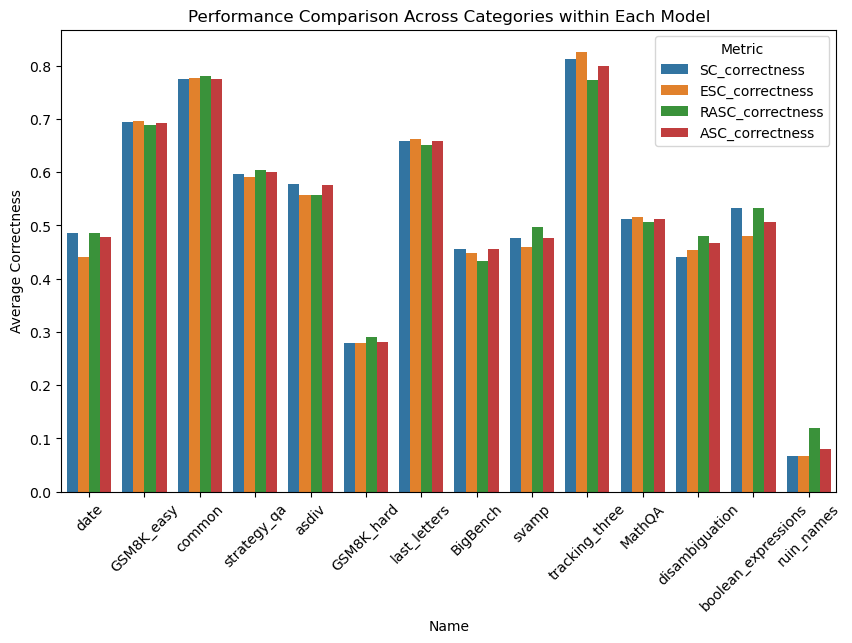

/tmp/ipykernel_160277/3469637296.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)


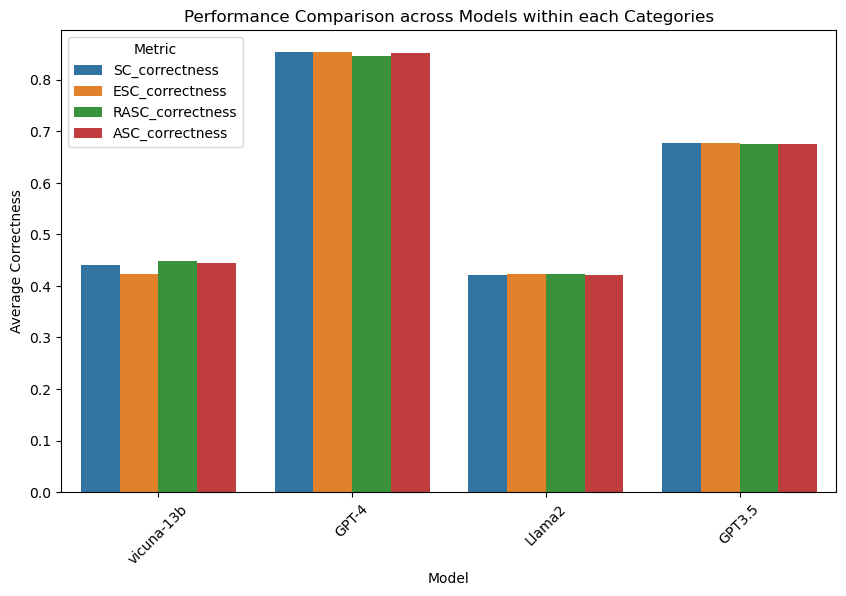

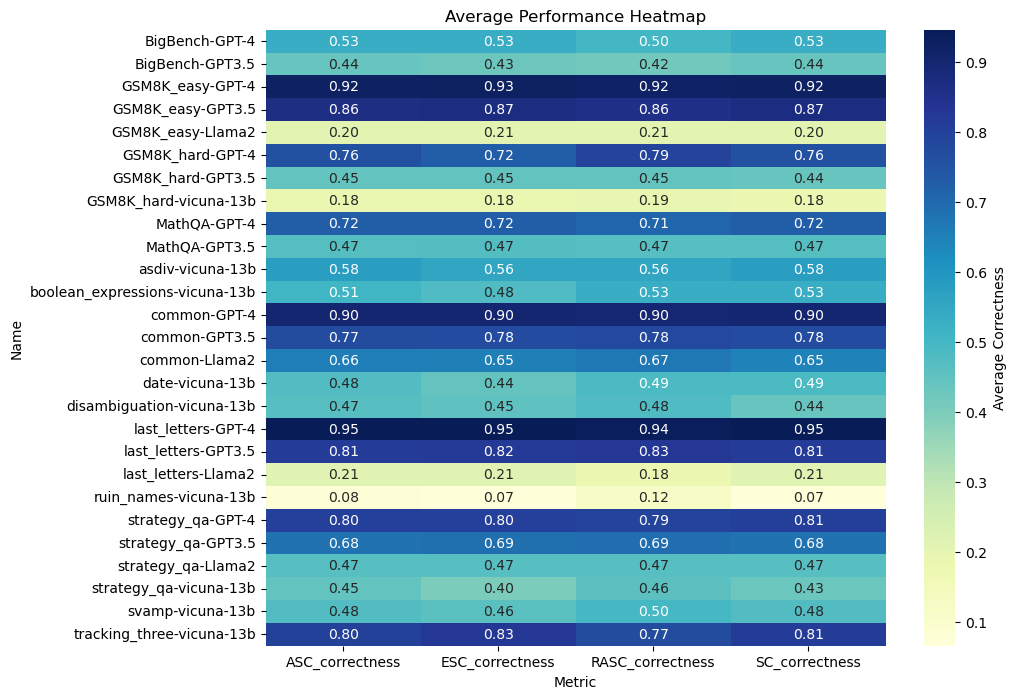

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame that includes 'asc_correctness' and 'asc_steps'

# Melt the DataFrame to convert it into a long format suitable for plotting
# Include 'asc_correctness' and 'asc_steps' in value_vars
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['SC_correctness', 'ESC_correctness', 'RASC_correctness', 'ASC_correctness'], var_name='Metric')
correctness_data = melted_df
# Plot 1: Compare average performance across different Names within each Model for correctness metrics
plt.figure(figsize=(10, 6))
# Filter melted_df to exclude 'asc_steps' for correctness comparison
sns.barplot(x='Name', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison Across Categories within Each Model')
plt.xlabel('Name')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average performance across different Models within each Name for correctness metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=correctness_data, ci=None)
plt.title('Performance Comparison across Models within each Categories')
plt.xlabel('Model')
plt.ylabel('Average Correctness')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average performance for each combination of Name and Model for correctness metrics
heatmap_data = correctness_data.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Correctness'})
plt.title('Average Performance Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()

/tmp/ipykernel_160277/4154816154.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)


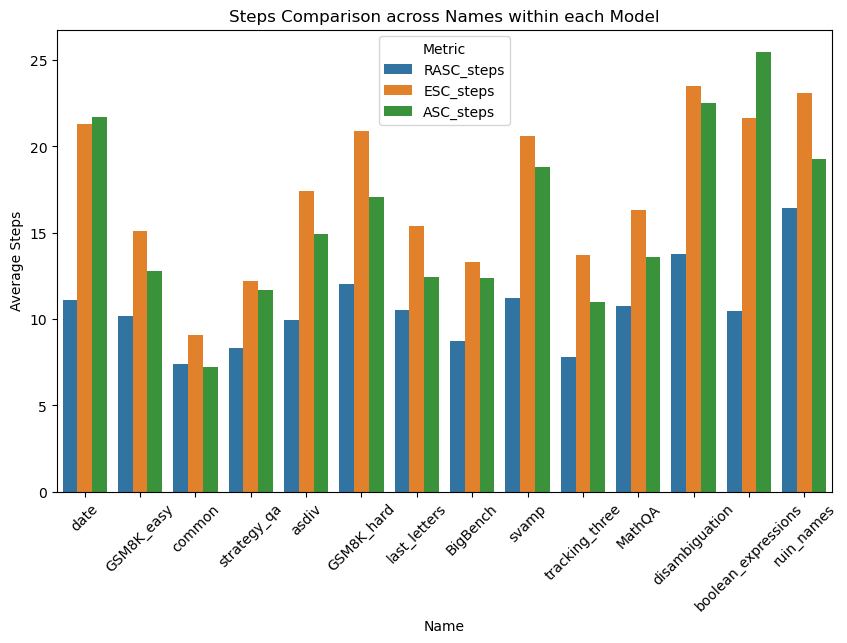

/tmp/ipykernel_160277/4154816154.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)


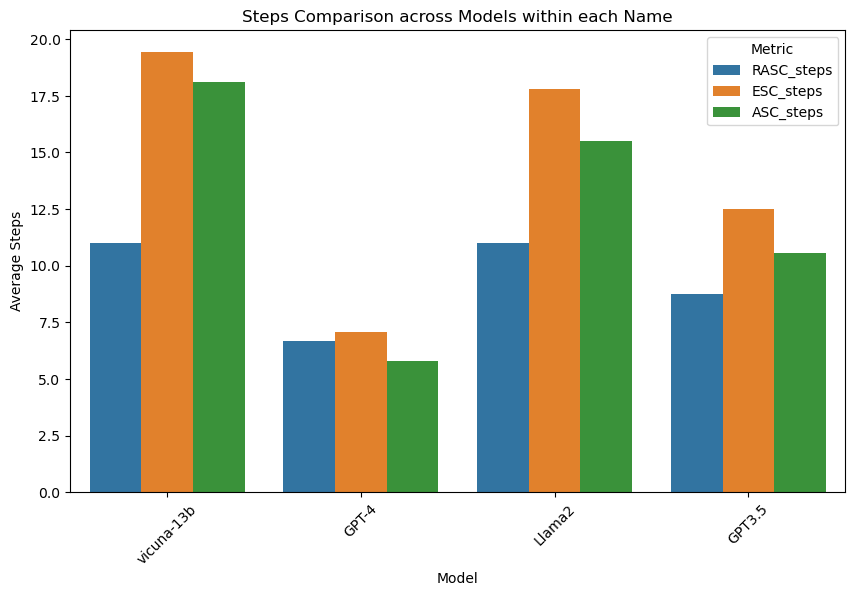

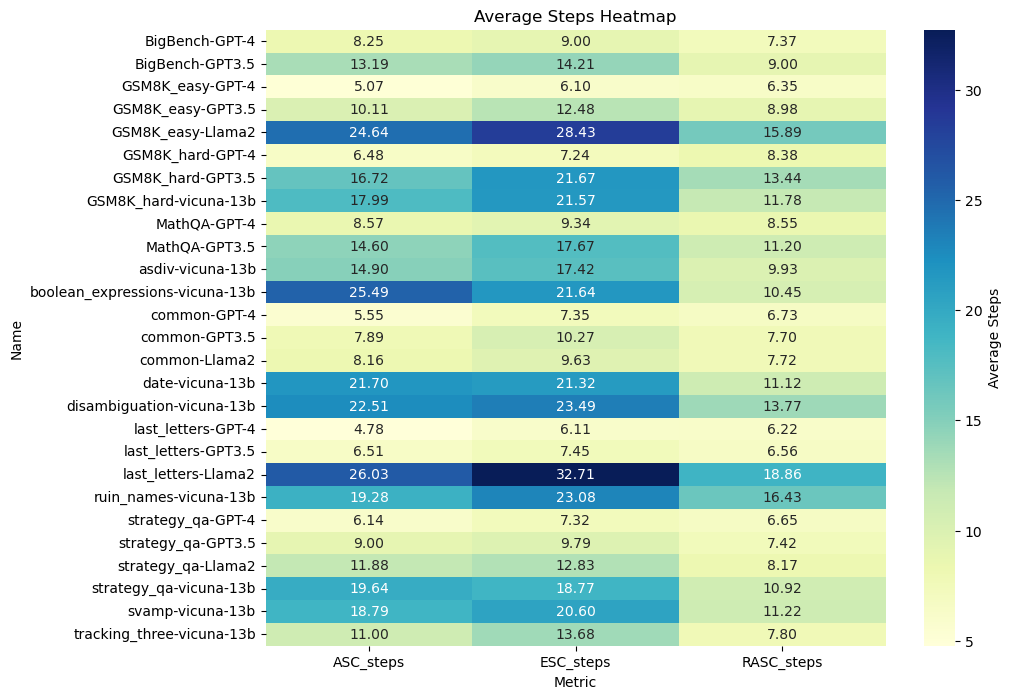

In [25]:
melted_df = pd.melt(df, id_vars=['Name', 'Model'], value_vars=['RASC_steps', 'ESC_steps', 'ASC_steps'], var_name='Metric')

# Plot 1: Compare average steps across different Names within each Model
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Names within each Model')
plt.xlabel('Name')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Compare average steps across different Models within each Name
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='value', hue='Metric', data=melted_df, ci=None)
plt.title('Steps Comparison across Models within each Name')
plt.xlabel('Model')
plt.ylabel('Average Steps')
plt.legend(title='Metric')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Heatmap to visualize the average steps for each combination of Name and Model
heatmap_data = melted_df.groupby(['Name', 'Model', 'Metric'])['value'].mean().unstack(level=-1)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Average Steps'})
plt.title('Average Steps Heatmap')
plt.xlabel('Metric')
plt.ylabel('Name')
plt.show()

# Ablation Study 1 (tradeoff between acc and step_reduction with different N and threshold)

/tmp/ipykernel_160277/1487493225.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  t_color_map = plt.cm.get_cmap('viridis')
/tmp/ipykernel_160277/1487493225.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  n_color_map = plt.cm.get_cmap('plasma')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start wit

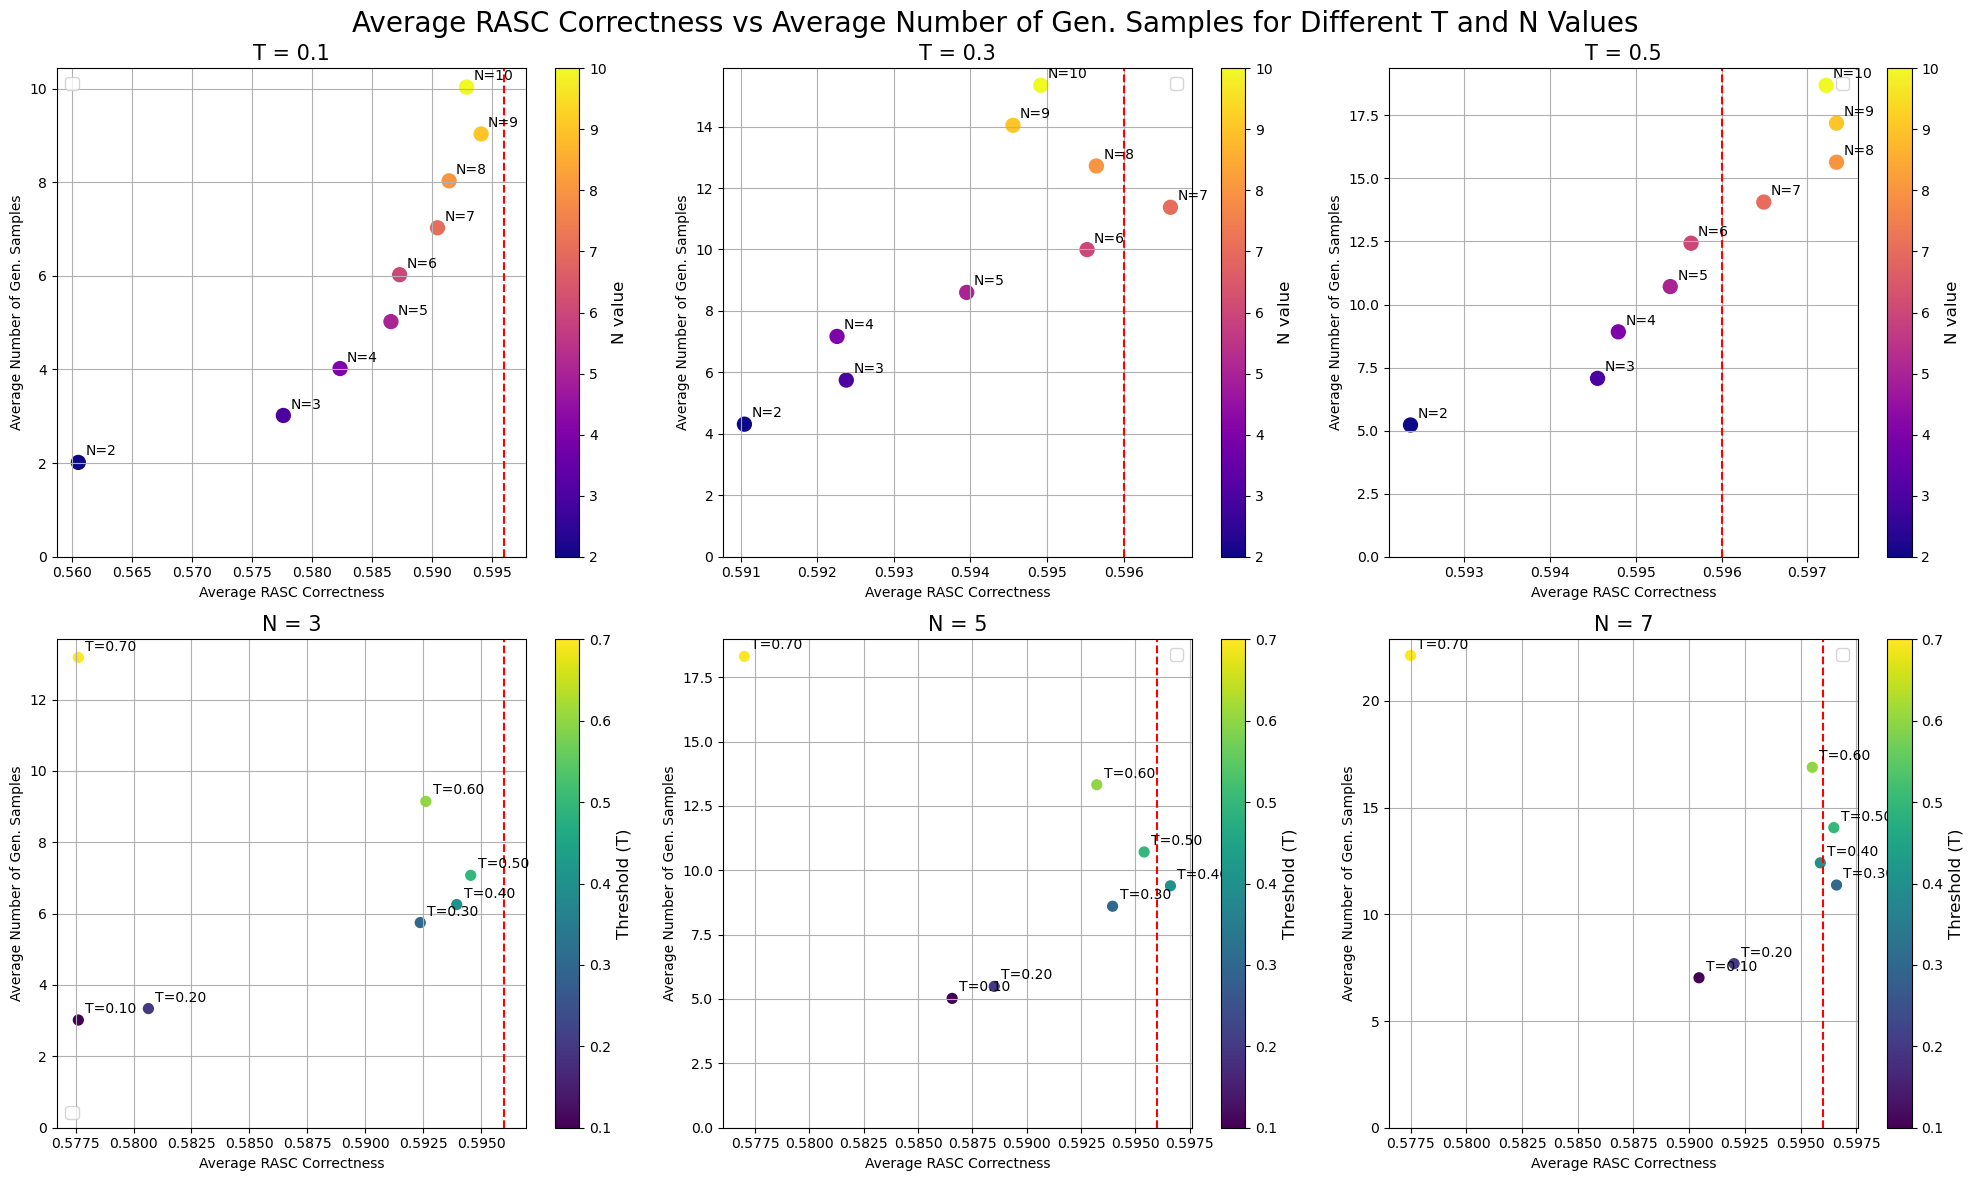

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
directory = "../../result/experiments_output/test_N_threshold"

# Initialize dictionaries to hold aggregated data
aggregated_data_T = {}
aggregated_data_N = {}

# List all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract the threshold value and N value from the filename
        threshold_value = float(filename.split('_threshold_')[1].split('_')[0])
        n_value = int(filename.split('_N_')[1].split('.')[0])
        
        # Skip if N is 1
        if n_value == 1:
            continue
        
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        
        # Calculate average correctness and steps
        avg_correctness = df['CS_correctness'].mean()
        avg_steps = df['CS_steps'].mean()
        
        # Aggregate data for T plots
        if threshold_value in [0.1, 0.3, 0.5]:
            if threshold_value not in aggregated_data_T:
                aggregated_data_T[threshold_value] = {'N': [], 'correctness': [], 'steps': []}
            aggregated_data_T[threshold_value]['N'].append(n_value)
            aggregated_data_T[threshold_value]['correctness'].append(avg_correctness)
            aggregated_data_T[threshold_value]['steps'].append(avg_steps)
        
        # Aggregate data for N plots
        if n_value in [3, 5, 7] and threshold_value <= 0.7:
            if n_value not in aggregated_data_N:
                aggregated_data_N[n_value] = {'threshold': [], 'correctness': [], 'steps': []}
            aggregated_data_N[n_value]['threshold'].append(threshold_value)
            aggregated_data_N[n_value]['correctness'].append(avg_correctness)
            aggregated_data_N[n_value]['steps'].append(avg_steps)

# Create a 2x3 subplot
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Average RASC Correctness vs Average Number of Gen. Samples for Different T and N Values', fontsize=20)

# Color maps
t_color_map = plt.cm.get_cmap('viridis')
n_color_map = plt.cm.get_cmap('plasma')

# Function to set common properties for all subplots
def set_subplot_properties(ax, xlabel, ylabel, title):
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_title(title, fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True)
    ax.legend(fontsize=12)
    ax.set_ylim(bottom=0)

# Plot T variations (top row)
for i, t in enumerate([0.1, 0.3, 0.5]):
    data = aggregated_data_T[t]
    scatter = axs[0, i].scatter(data['correctness'], data['steps'], c=data['N'], cmap=n_color_map, s=100)
    cbar = plt.colorbar(scatter, ax=axs[0, i])
    cbar.set_label('N value', fontsize = 12)
    cbar.ax.tick_params(labelsize=10)
    set_subplot_properties(axs[0, i], 'Average RASC Correctness', 'Average Number of Gen. Samples', f'T = {t}')
    sc_accuracy = df['SC_correctness'].mean()
    axs[0, i].axvline(x=sc_accuracy, color='red', linestyle='--', linewidth=1.5, label=f'Mean Acc of SC')
    for j, n in enumerate(data['N']):
        axs[0, i].annotate(f'N={n}', (data['correctness'][j], data['steps'][j]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=10)

# Plot N variations (bottom row)
for i, n in enumerate([3, 5, 7]):
    data = aggregated_data_N[n]
    scatter = axs[1, i].scatter(data['correctness'], data['steps'], c=data['threshold'], cmap=t_color_map, s=50)
    cbar = plt.colorbar(scatter, ax=axs[1, i])
    cbar.set_label('Threshold (T)', fontsize=12)
    cbar.ax.tick_params(labelsize=10)
    set_subplot_properties(axs[1, i], 'Average RASC Correctness', 'Average Number of Gen. Samples', f'N = {n}')
    sc_accuracy = df['SC_correctness'].mean()
    axs[1, i].axvline(x=sc_accuracy, color='red', linestyle='--', linewidth=1.5, label=f'Mean Acc of SC')
    for j, t in enumerate(data['threshold']):
        axs[1, i].annotate(f'T={t:.2f}', (data['correctness'][j], data['steps'][j]), 
                           xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("RASC_Performance_Comparison.png", format="png", dpi=500, bbox_inches="tight")

plt.show()

